In [255]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.lines as mlines
from pylab import bone, pcolor, colorbar, plot, show

!pip install minisom
from minisom import MiniSom
from sklearn.preprocessing import MinMaxScaler

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


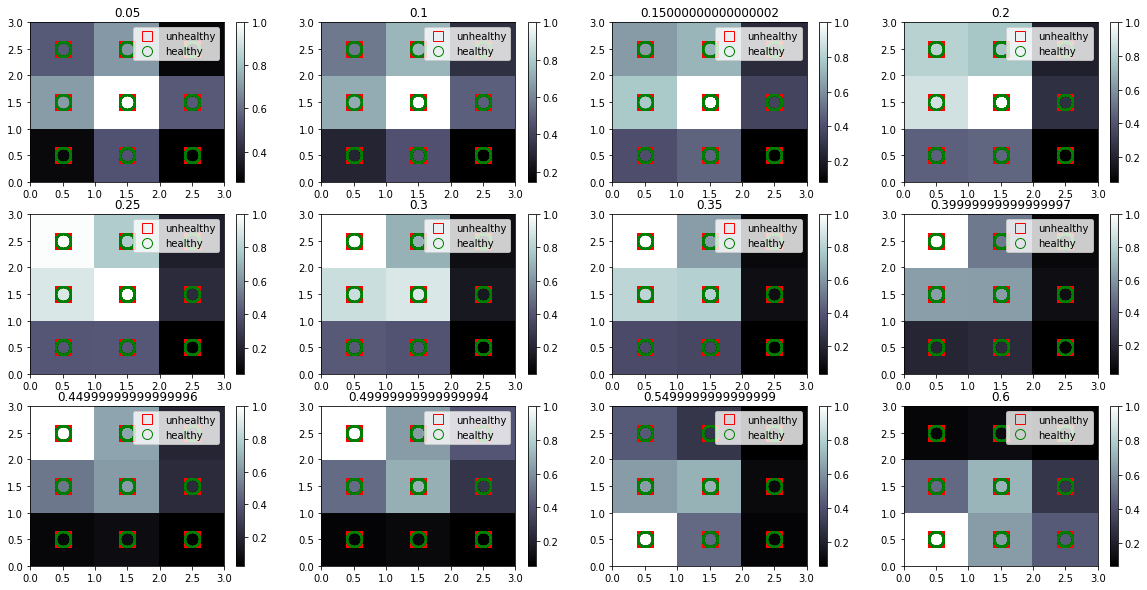

In [256]:
plt.figure(figsize = (20,10))
lr = 0

for i in range(12):
  lr += 0.05
  plt.subplot(3,4,i+1)
  plt.title(lr)

  main_df = pd.read_csv('drive/MyDrive/ColabNotebooks/UMA/virus_df_full_only_age.csv').drop(['Country', 
                                                                                             'Age', 
                                                                                             'Health_Status', 
                                                                                             'Archaeal', 
                                                                                             'Bacteriophage', 
                                                                                             'Eukaryotic', 
                                                                                             'crassphage'], axis=1) 
  # main_df = main_df[main_df['Myoviridae'] < 50]
  main_df = main_df[main_df['Age_Mix'] != 1.0].drop(['Age_Mix'], axis=1) 

  target = 'Healthy'

  X = main_df.loc[:,main_df.columns!=target]
  y = main_df.loc[:,main_df.columns==target]

  oversample = SMOTE(random_state=42)
  X, y = oversample.fit_resample(X, y)

  virus_ml_df = pd.concat([X, y], axis=1)
  X = virus_ml_df.drop(['Healthy'], axis=1).values
  y = virus_ml_df['Healthy'].values 

  som = MiniSom(x=3, y=3, input_len=32, sigma=2.0, learning_rate=lr, random_seed=42)
  som.random_weights_init(X)
  som.train_batch(data=X, num_iteration=250)

  # plt.figure(figsize = (20,10))
  bone()
  pcolor(som.distance_map().T)
  colorbar() 

  markers = ['o', 's']
  colors = ['green', 'red']
  status = ['healthy', 'unheathy']

  ls_tmp = []

  for i, j in enumerate(X):          
      wn = som.winner(j) 
      plot(wn[0] + 0.5, wn[1] + 0.5, markers[int(y[i])], markeredgecolor = colors[int(y[i])], markerfacecolor = 'None', markersize=15,
                  markeredgewidth = 2)
      # if wn[0] == 1:
        # if wn[1] == 4:
          # ls_tmp.append(int(y[i]))
      
  red_square = mlines.Line2D([], [], color='red', marker='s', linestyle='None', markerfacecolor = 'None',
                            markersize=10, label='unhealthy')
  green_circle = mlines.Line2D([], [], color='green', marker='o', linestyle='None', markerfacecolor = 'None',
                            markersize=10, label='healthy')
  plt.legend(handles=[red_square, green_circle], loc=1)

53.84615384615385


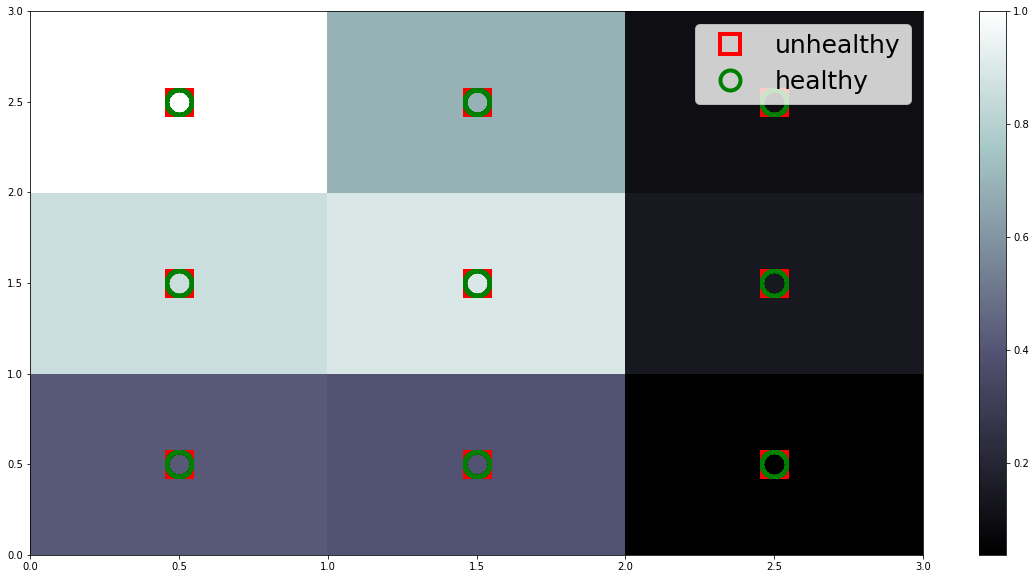

In [257]:
main_df = pd.read_csv('drive/MyDrive/ColabNotebooks/UMA/virus_df_full_only_age.csv').drop(['Country', 
                                                                                             'Age', 
                                                                                             'Health_Status', 
                                                                                             'Archaeal', 
                                                                                             'Bacteriophage', 
                                                                                             'Eukaryotic', 
                                                                                             'crassphage'], axis=1) 
main_df = main_df[main_df['Age_Mix'] != 1.0].drop(['Age_Mix'], axis=1) 
# main_df = main_df[main_df['Myoviridae'] < 50]  

target = 'Healthy'
X = main_df.loc[:,main_df.columns!=target]
y = main_df.loc[:,main_df.columns==target]

oversample = SMOTE(random_state=42)
X, y = oversample.fit_resample(X, y)

virus_ml_df = pd.concat([X, y], axis=1)
X = virus_ml_df.drop(['Healthy'], axis=1).values
y = virus_ml_df['Healthy'].values 

som = MiniSom(x=3, y=3, input_len=32, sigma=2.0, learning_rate=0.3, random_seed=42)
som.random_weights_init(X)
som.train_batch(data=X, num_iteration=250)

plt.figure(figsize = (20,10))
bone()
pcolor(som.distance_map().T)
colorbar() 

markers = ['o', 's']
colors = ['green', 'red']
status = ['healthy', 'unheathy']

ls_tmp = []

for i, j in enumerate(X):          
    wn = som.winner(j)             
    plot(wn[0] + 0.5, wn[1] + 0.5, markers[int(y[i])], markeredgecolor = colors[int(y[i])], markerfacecolor = 'None', markersize=25,
                markeredgewidth = 4)
    if wn[0] == 0:
      if wn[1] == 2:
        ls_tmp.append(int(y[i]))
      
red_square = mlines.Line2D([], [], color='red', marker='s', linestyle='None', markerfacecolor = 'None',
                          markersize=20, markeredgewidth=4, label='unhealthy')
green_circle = mlines.Line2D([], [], color='green', marker='o', linestyle='None', markerfacecolor = 'None',
                          markersize=20, markeredgewidth=4, label='healthy')
plt.legend(handles=[red_square, green_circle], loc=1, fontsize=25)

print(ls_tmp.count(1)/(ls_tmp.count(0)+ls_tmp.count(1))*100)

In [258]:
mappings = som.win_map(X) 
result = mappings[(0,2)]
df_result = pd.DataFrame(result)
# df_result['Heathy'] = ls_tmp
print(df_result.shape)

columns_old = df_result.columns.tolist()

columns_main = main_df.columns.tolist()[1:]

for i in range(len(columns_old)):
  df_result = df_result.rename({columns_old[i]: columns_main[i]}, axis=1)
df_result.head()

(104, 32)


,Ackermannviridae,Adenoviridae,Alphaflexiviridae,Anelloviridae,Asfarviridae,Astroviridae,Bicaudaviridae,Caliciviridae,Circoviridae,Cruliviridae,...,Polyomaviridae,Poxviridae,Rudiviridae,Siphoviridae,Smacoviridae,Virgaviridae,Age_Child,Age_Adult,Age_Infant,Age_Elderly
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,47.2,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,39.9,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,39.8,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,33.7,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,43.0,0.0,0.0,0.0,1.0,0.0,0.0


In [259]:
df = df_result[['Myoviridae', 'Siphoviridae', 'Podoviridae', 'Microviridae']]
# df = df_result
df['Healthy'] = ls_tmp
df = df[df['Healthy']==1]
df

<ipython-input-259-16d35ed237b6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Healthy'] = ls_tmp


,Myoviridae,Siphoviridae,Podoviridae,Microviridae,Healthy
0,0.00,47.2,0.00,0.00,1
2,0.00,39.8,39.80,39.80,1
3,0.00,33.7,22.50,56.20,1
4,12.00,43.0,55.00,0.00,1
5,8.31,55.4,11.10,5.54,1
6,0.00,132.0,26.30,61.40,1
7,4.48,80.6,85.10,0.00,1
8,0.00,121.0,53.90,40.40,1
9,0.00,43.0,11.50,17.20,1
10,13.70,247.0,41.20,27.50,1


In [260]:
df.mean()

Myoviridae       15.650357
Siphoviridae    103.862500
Podoviridae      42.917857
Microviridae     39.039107
Healthy           1.000000
dtype: float64

In [261]:
def calculate_outliers(data):
    q25 = data.quantile(0.25)
    q75 = data.quantile(0.75)
    iqr = q75 - q25
    boundaries = (q25, q75)
    return boundaries

In [262]:
df_critical_values = pd.DataFrame()
for col in df.columns:
    col_outliers = calculate_outliers(df[col])
    col_max = df[col].max()
    col_stats = {'mean': df[col].mean(),
                 'q25': col_outliers[0],
                 'q75': col_outliers[1],
                 'max': col_max}
    df_critical_values[col] = pd.Series(col_stats)
df_critical_values = df_critical_values.drop(['Healthy'], axis=1).T
df_critical_values

,mean,q25,q75,max
Myoviridae,15.650357,0.00,17.225,153.0
Siphoviridae,103.862500,46.65,121.500,343.0
Podoviridae,42.917857,2.40,49.400,365.0
Microviridae,39.039107,0.00,43.025,539.0


In [263]:
virus_ml_df['Healthy'].value_counts()

1.0    1275
0.0    1275
Name: Healthy, dtype: int64

In [264]:
test = virus_ml_df
test = test[(test['Myoviridae']>0) & (test['Myoviridae']<43.0625) & (test['Siphoviridae']>46.65) & (test['Siphoviridae']<233.775) &
            (test['Podoviridae']>2.4) & (test['Podoviridae']<119.9) & (test['Microviridae']>0) & (test['Microviridae']<107.56)]

test['Healthy'].value_counts()

0.0    11
1.0     5
Name: Healthy, dtype: int64

child

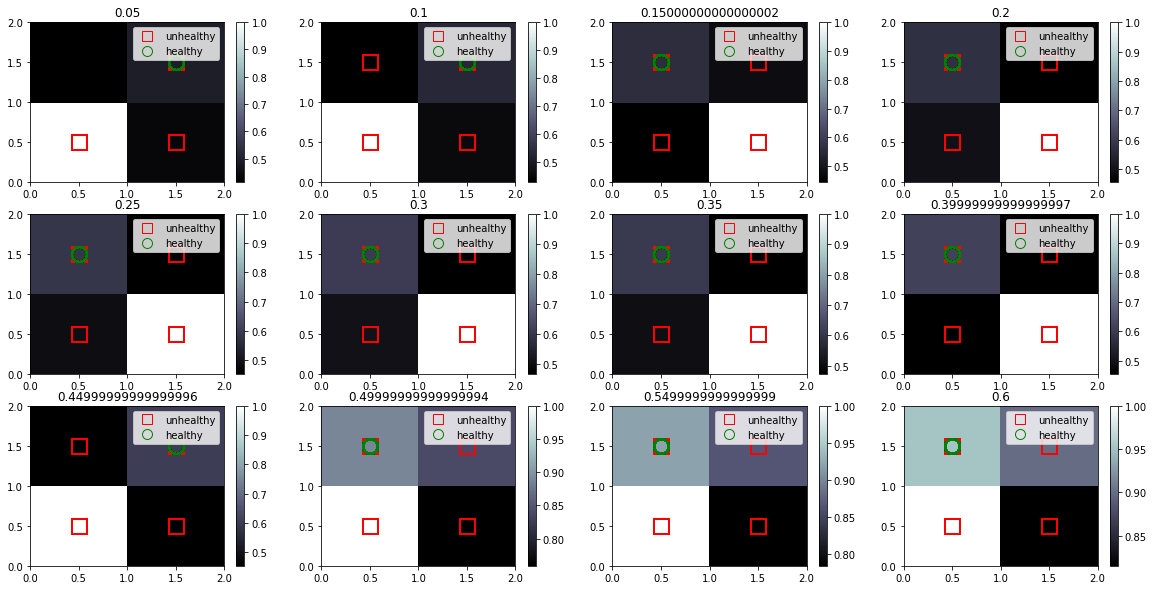

In [265]:
plt.figure(figsize = (20,10))
lr = 0

for i in range(12):
  lr += 0.05
  plt.subplot(3,4,i+1)
  plt.title(lr)

  main_df = pd.read_csv('drive/MyDrive/ColabNotebooks/UMA/virus_df_full_only_age.csv').drop(['Country', 
                                                                                             'Age', 
                                                                                             'Health_Status', 
                                                                                             'Archaeal', 
                                                                                             'Bacteriophage', 
                                                                                             'Eukaryotic', 
                                                                                             'crassphage'], axis=1) 
  main_df = main_df[main_df['Age_Child'] == 1.0]
  main_df = main_df.drop(['Age_Mix', 'Age_Adult', 'Age_Elderly', 'Age_Infant', 'Age_Child'], axis=1)  

  target = 'Healthy'

  X = main_df.loc[:,main_df.columns!=target]
  y = main_df.loc[:,main_df.columns==target]

  oversample = SMOTE(random_state=42)
  X, y = oversample.fit_resample(X, y)

  virus_ml_df = pd.concat([X, y], axis=1)
  X = virus_ml_df.drop(['Healthy'], axis=1).values
  y = virus_ml_df['Healthy'].values 

  som = MiniSom(x=2, y=2, input_len=28, sigma=1.0, learning_rate=lr, random_seed=42)
  som.random_weights_init(X)
  som.train_batch(data=X, num_iteration=200)

  # plt.figure(figsize = (20,10))
  bone()
  pcolor(som.distance_map().T)
  colorbar() 

  markers = ['o', 's']
  colors = ['green', 'red']
  status = ['healthy', 'unheathy']

  ls_tmp = []

  for i, j in enumerate(X):          
      wn = som.winner(j) 
      plot(wn[0] + 0.5, wn[1] + 0.5, markers[int(y[i])], markeredgecolor = colors[int(y[i])], markerfacecolor = 'None', markersize=15,
                  markeredgewidth = 2)
      # if wn[0] == 1:
        # if wn[1] == 4:
          # ls_tmp.append(int(y[i]))
      
  red_square = mlines.Line2D([], [], color='red', marker='s', linestyle='None', markerfacecolor = 'None',
                            markersize=10, label='unhealthy')
  green_circle = mlines.Line2D([], [], color='green', marker='o', linestyle='None', markerfacecolor = 'None',
                            markersize=10, label='healthy')
  plt.legend(handles=[red_square, green_circle], loc=1)

100.0


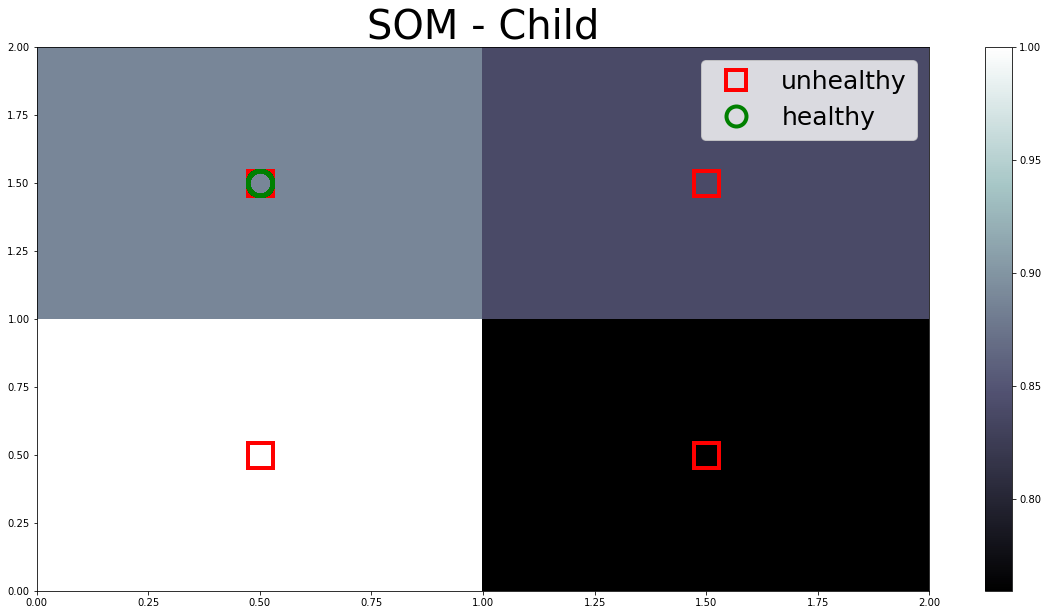

In [266]:
main_df = pd.read_csv('drive/MyDrive/ColabNotebooks/UMA/virus_df_full_only_age.csv').drop(['Country', 
                                                                                             'Age', 
                                                                                             'Health_Status', 
                                                                                             'Archaeal', 
                                                                                             'Bacteriophage', 
                                                                                             'Eukaryotic', 
                                                                                             'crassphage'], axis=1) 
main_df = main_df[main_df['Age_Child'] == 1.0]
main_df = main_df.drop(['Age_Mix', 'Age_Adult', 'Age_Elderly', 'Age_Infant', 'Age_Child'], axis=1)   

target = 'Healthy'
X = main_df.loc[:,main_df.columns!=target]
y = main_df.loc[:,main_df.columns==target]

oversample = SMOTE(random_state=42)
X, y = oversample.fit_resample(X, y)

virus_ml_df = pd.concat([X, y], axis=1)
X = virus_ml_df.drop(['Healthy'], axis=1).values
y = virus_ml_df['Healthy'].values 

som = MiniSom(x=2, y=2, input_len=28, sigma=1.0, learning_rate=0.5, random_seed=42)
som.random_weights_init(X)
som.train_batch(data=X, num_iteration=200)

plt.figure(figsize = (20,10))
bone()
pcolor(som.distance_map().T)
colorbar() 

markers = ['o', 's']
colors = ['green', 'red']
status = ['healthy', 'unheathy']

ls_tmp = []

for i, j in enumerate(X):          
    wn = som.winner(j)             
    plot(wn[0] + 0.5, wn[1] + 0.5, markers[int(y[i])], markeredgecolor = colors[int(y[i])], markerfacecolor = 'None', markersize=25,
                markeredgewidth = 4)
    if wn[0] == 0:
      if wn[1] == 0:
        ls_tmp.append(int(y[i]))
      
red_square = mlines.Line2D([], [], color='red', marker='s', linestyle='None', markerfacecolor = 'None',
                          markersize=20, markeredgewidth=4, label='unhealthy')
green_circle = mlines.Line2D([], [], color='green', marker='o', linestyle='None', markerfacecolor = 'None',
                          markersize=20, markeredgewidth=4, label='healthy')
plt.legend(handles=[red_square, green_circle], loc=1, fontsize=25)
plt.title("SOM - Child", fontsize=40)
# plt.savefig("/content/drive/MyDrive/ColabNotebooks/UMA/som_child.png", dpi=700)

print(ls_tmp.count(1)/(ls_tmp.count(0)+ls_tmp.count(1))*100)

In [267]:
mappings = som.win_map(X) 
result = mappings[(0,0)]
df_result = pd.DataFrame(result)
# df_result['Heathy'] = ls_tmp
print(df_result.shape)

columns_old = df_result.columns.tolist()

columns_main = main_df.columns.tolist()[1:]

for i in range(len(columns_old)):
  df_result = df_result.rename({columns_old[i]: columns_main[i]}, axis=1)
df_result.head()

(15, 28)


,Ackermannviridae,Adenoviridae,Alphaflexiviridae,Anelloviridae,Asfarviridae,Astroviridae,Bicaudaviridae,Caliciviridae,Circoviridae,Cruliviridae,...,Papillomaviridae,Parvoviridae,Picornaviridae,Podoviridae,Polyomaviridae,Poxviridae,Rudiviridae,Siphoviridae,Smacoviridae,Virgaviridae
0,0.0,0.0,0.0,404.0,0.0,0.0,0.0,0.0,25.2,0.0,...,0.0,0.0,0.0,25.2,0.0,0.0,0.0,50.5,0.0,0.0
1,0.0,0.0,0.0,565.0,0.0,0.0,0.0,0.0,77.0,0.0,...,0.0,0.0,0.0,103.0,0.0,0.0,0.0,180.0,0.0,0.0
2,0.0,0.0,0.0,444.0,0.0,0.0,0.0,0.0,40.4,0.0,...,0.0,0.0,0.0,121.0,0.0,0.0,0.0,60.5,0.0,0.0
3,0.0,0.0,0.0,596.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,37.3,0.0,0.0,0.0,74.5,0.0,0.0
4,0.0,0.0,0.0,1170.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,50.0,0.0,0.0,0.0,50.0,0.0,0.0


In [268]:
df = df_result[['Myoviridae', 'Siphoviridae', 'Podoviridae', 'Microviridae']]
# df = df_result
df['Healthy'] = ls_tmp
df = df[df['Healthy']==1]
df

<ipython-input-268-16d35ed237b6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Healthy'] = ls_tmp


,Myoviridae,Siphoviridae,Podoviridae,Microviridae,Healthy
0,0.0,50.5,25.2,25.2,1
1,25.7,180.0,103.0,51.4,1
2,30.3,60.5,121.0,10.1,1
3,55.9,74.5,37.3,18.6,1
4,16.7,50.0,50.0,0.0,1
5,0.0,21.0,63.0,42.0,1
6,38.2,115.0,38.2,0.0,1
7,37.6,37.6,37.6,0.0,1
8,265.0,0.0,0.0,88.3,1
9,12.2,36.5,36.5,0.0,1


In [269]:
df.mean()

Myoviridae      52.533333
Siphoviridae    74.353333
Podoviridae     50.020000
Microviridae    29.766667
Healthy          1.000000
dtype: float64

In [270]:
def calculate_outliers(data):
    q25 = data.quantile(0.25)
    q75 = data.quantile(0.75)
    iqr = q75 - q25
    boundaries = (q25, q75 + 1.5 * iqr)
    return boundaries

In [271]:
df_critical_values = pd.DataFrame()
for col in df.columns:
    col_outliers = calculate_outliers(df[col])
    col_max = df[col].max()
    col_stats = {'mean': df[col].mean(),
                 'q25': col_outliers[0],
                 'q75': col_outliers[1],
                 'max': col_max}
    df_critical_values[col] = pd.Series(col_stats)
df_critical_values = df_critical_values.drop(['Healthy'], axis=1).T
df_critical_values

,mean,q25,q75,max
Myoviridae,52.533333,0.00,94.750,291.0
Siphoviridae,74.353333,37.05,200.800,229.0
Podoviridae,50.020000,21.85,174.725,121.0
Microviridae,29.766667,0.00,135.000,97.0


adult

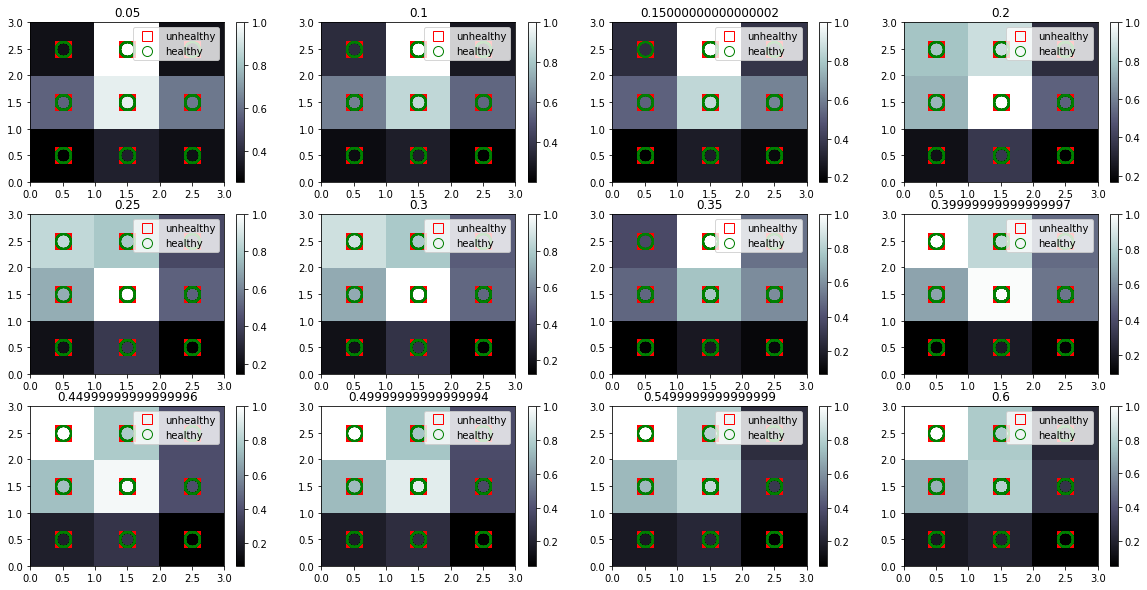

In [272]:
plt.figure(figsize = (20,10))
lr = 0

for i in range(12):
  lr += 0.05
  plt.subplot(3,4,i+1)
  plt.title(lr)

  main_df = pd.read_csv('drive/MyDrive/ColabNotebooks/UMA/virus_df_full_only_age.csv').drop(['Country', 
                                                                                             'Age', 
                                                                                             'Health_Status', 
                                                                                             'Archaeal', 
                                                                                             'Bacteriophage', 
                                                                                             'Eukaryotic', 
                                                                                             'crassphage'], axis=1) 
  main_df = main_df[main_df['Age_Adult'] == 1.0]
  main_df = main_df.drop(['Age_Mix', 'Age_Adult', 'Age_Elderly', 'Age_Infant', 'Age_Child'], axis=1)  

  target = 'Healthy'

  X = main_df.loc[:,main_df.columns!=target]
  y = main_df.loc[:,main_df.columns==target]

  oversample = SMOTE(random_state=42)
  X, y = oversample.fit_resample(X, y)

  virus_ml_df = pd.concat([X, y], axis=1)
  X = virus_ml_df.drop(['Healthy'], axis=1).values
  y = virus_ml_df['Healthy'].values 

  som = MiniSom(x=3, y=3, input_len=28, sigma=1.0, learning_rate=lr, random_seed=42)
  som.random_weights_init(X)
  som.train_batch(data=X, num_iteration=300)

  # plt.figure(figsize = (20,10))
  bone()
  pcolor(som.distance_map().T)
  colorbar() 

  markers = ['o', 's']
  colors = ['green', 'red']
  status = ['healthy', 'unheathy']

  ls_tmp = []

  for i, j in enumerate(X):          
      wn = som.winner(j) 
      plot(wn[0] + 0.5, wn[1] + 0.5, markers[int(y[i])], markeredgecolor = colors[int(y[i])], markerfacecolor = 'None', markersize=15,
                  markeredgewidth = 2)
      # if wn[0] == 1:
        # if wn[1] == 4:
          # ls_tmp.append(int(y[i]))
      
  red_square = mlines.Line2D([], [], color='red', marker='s', linestyle='None', markerfacecolor = 'None',
                            markersize=10, label='unhealthy')
  green_circle = mlines.Line2D([], [], color='green', marker='o', linestyle='None', markerfacecolor = 'None',
                            markersize=10, label='healthy')
  plt.legend(handles=[red_square, green_circle], loc=1)

37.5


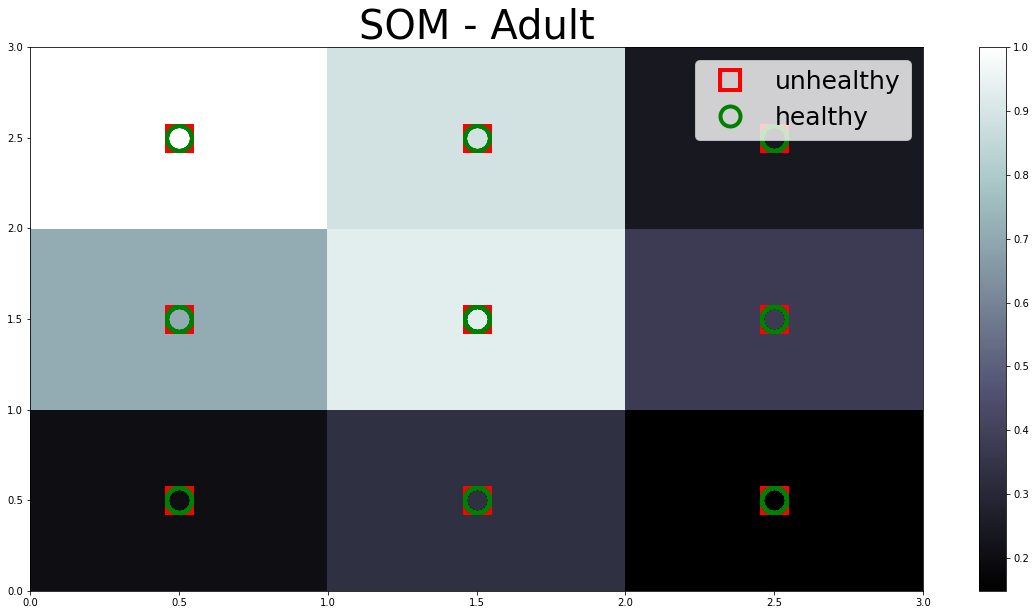

In [273]:
main_df = pd.read_csv('drive/MyDrive/ColabNotebooks/UMA/virus_df_full_only_age.csv').drop(['Country', 
                                                                                             'Age', 
                                                                                             'Health_Status', 
                                                                                             'Archaeal', 
                                                                                             'Bacteriophage', 
                                                                                             'Eukaryotic', 
                                                                                             'crassphage'], axis=1) 
main_df = main_df[main_df['Age_Adult'] == 1.0]
main_df = main_df.drop(['Age_Mix', 'Age_Adult', 'Age_Elderly', 'Age_Infant', 'Age_Child'], axis=1)   

target = 'Healthy'
X = main_df.loc[:,main_df.columns!=target]
y = main_df.loc[:,main_df.columns==target]

oversample = SMOTE(random_state=42)
X, y = oversample.fit_resample(X, y)

virus_ml_df = pd.concat([X, y], axis=1)
X = virus_ml_df.drop(['Healthy'], axis=1).values
y = virus_ml_df['Healthy'].values 

som = MiniSom(x=3, y=3, input_len=28, sigma=1.0, learning_rate=0.6, random_seed=42)
som.random_weights_init(X)
som.train_batch(data=X, num_iteration=200)

plt.figure(figsize = (20,10))
bone()
pcolor(som.distance_map().T)
colorbar() 

markers = ['o', 's']
colors = ['green', 'red']
status = ['healthy', 'unheathy']

ls_tmp = []

for i, j in enumerate(X):          
    wn = som.winner(j)             
    plot(wn[0] + 0.5, wn[1] + 0.5, markers[int(y[i])], markeredgecolor = colors[int(y[i])], markerfacecolor = 'None', markersize=25,
                markeredgewidth = 4)
    if wn[0] == 0:
      if wn[1] == 0:
        ls_tmp.append(int(y[i]))
      
red_square = mlines.Line2D([], [], color='red', marker='s', linestyle='None', markerfacecolor = 'None',
                          markersize=20, markeredgewidth=4, label='unhealthy')
green_circle = mlines.Line2D([], [], color='green', marker='o', linestyle='None', markerfacecolor = 'None',
                          markersize=20, markeredgewidth=4, label='healthy')
plt.legend(handles=[red_square, green_circle], loc=1, fontsize=25)
plt.title("SOM - Adult", fontsize=40)
# plt.savefig("/content/drive/MyDrive/ColabNotebooks/UMA/som_adult.png", dpi=700)

print(ls_tmp.count(1)/(ls_tmp.count(0)+ls_tmp.count(1))*100)

In [274]:
mappings = som.win_map(X) 
result = mappings[(0,0)]
df_result = pd.DataFrame(result)
# df_result['Heathy'] = ls_tmp
print(df_result.shape)

columns_old = df_result.columns.tolist()

columns_main = main_df.columns.tolist()[1:]

for i in range(len(columns_old)):
  df_result = df_result.rename({columns_old[i]: columns_main[i]}, axis=1)
df_result.head()

(48, 28)


,Ackermannviridae,Adenoviridae,Alphaflexiviridae,Anelloviridae,Asfarviridae,Astroviridae,Bicaudaviridae,Caliciviridae,Circoviridae,Cruliviridae,...,Papillomaviridae,Parvoviridae,Picornaviridae,Podoviridae,Polyomaviridae,Poxviridae,Rudiviridae,Siphoviridae,Smacoviridae,Virgaviridae
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,39.9,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.30,0.0,0.0,0.0,27.9,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,23.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.74,0.0,0.0,0.0,24.3,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.49,0.0,0.0,0.0,33.0,0.0,0.0


In [275]:
# df = df_result[['Myoviridae', 'Siphoviridae', 'Podoviridae', 'Microviridae']]
df = df_result
df['Heathy'] = ls_tmp
df = df[df['Heathy']==1]
df

,Ackermannviridae,Adenoviridae,Alphaflexiviridae,Anelloviridae,Asfarviridae,Astroviridae,Bicaudaviridae,Caliciviridae,Circoviridae,Cruliviridae,...,Parvoviridae,Picornaviridae,Podoviridae,Polyomaviridae,Poxviridae,Rudiviridae,Siphoviridae,Smacoviridae,Virgaviridae,Heathy
3,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,1.74,0.0,0.0,0.0,24.3,0.0,0.0,1
4,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,5.49,0.0,0.0,0.0,33.0,0.0,0.0,1
5,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,8.68,0.0,0.0,0.0,34.7,0.0,0.0,1
6,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,5.64,0.0,0.0,0.0,30.1,0.0,0.0,1
7,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,7.86,0.0,0.0,0.0,27.5,0.0,0.0,1
8,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,3.35,0.0,0.0,0.0,35.1,0.0,0.0,1
9,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,4.95,0.0,0.0,0.0,34.6,0.0,0.0,1
10,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,5.12,0.0,0.0,0.0,27.3,0.0,0.0,1
11,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,35.7,0.0,0.0,1
12,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,4.56,0.0,0.0,0.0,25.1,0.0,0.0,1


In [276]:
df.mean()

Ackermannviridae      0.000000
Adenoviridae          0.000000
Alphaflexiviridae     0.000000
Anelloviridae         0.539444
Asfarviridae          0.000000
Astroviridae          0.000000
Bicaudaviridae        0.000000
Caliciviridae         0.000000
Circoviridae          0.220556
Cruliviridae          0.000000
Geminiviridae         0.000000
Genomoviridae         0.886111
Herpesviridae         0.025000
Inoviridae            0.104444
Iridoviridae          0.000000
Lipothrixviridae      0.000000
Microviridae          5.721667
Myoviridae            5.557778
Papillomaviridae      0.098889
Parvoviridae          0.000000
Picornaviridae        0.000000
Podoviridae           5.571111
Polyomaviridae        0.000000
Poxviridae            0.000000
Rudiviridae           0.000000
Siphoviridae         31.111111
Smacoviridae          0.000000
Virgaviridae          0.000000
Heathy                1.000000
dtype: float64